In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
car_details = pd.read_csv("D:/Learning_ML/Linear_regression/car_details.csv")

In [3]:
car_details.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
car_details = pd.get_dummies(car_details, columns=['fuel'], drop_first=True)


In [8]:
fuel_columns = ['fuel_Diesel', 'fuel_Electric', 'fuel_LPG', 'fuel_Petrol']
car_details[fuel_columns] = car_details[fuel_columns].astype(int)


In [10]:
car_details = pd.get_dummies(car_details, columns=['seller_type'], drop_first=True)

In [15]:
seller_type_columns = ['seller_type_Individual', 'seller_type_Trustmark Dealer']
car_details[seller_type_columns] = car_details[seller_type_columns].astype(int)


In [17]:
car_details = pd.get_dummies(car_details, columns=['owner'], drop_first=True)

In [22]:
owner_columns = ['owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Test Drive Car','owner_Third Owner']
car_details[owner_columns] = car_details[owner_columns].astype(int)

In [24]:
car_details['transmission'] = car_details['transmission'].map({'Manual': 0, 'Automatic': 1})


In [32]:
car_details = car_details.drop('name', axis=1)


In [33]:
x = car_details[['fuel_Diesel', 'fuel_Electric', 'fuel_LPG', 'fuel_Petrol','transmission','owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Test Drive Car','owner_Third Owner','seller_type_Individual', 'seller_type_Trustmark Dealer']].values
y = car_details["selling_price"]


<Axes: >

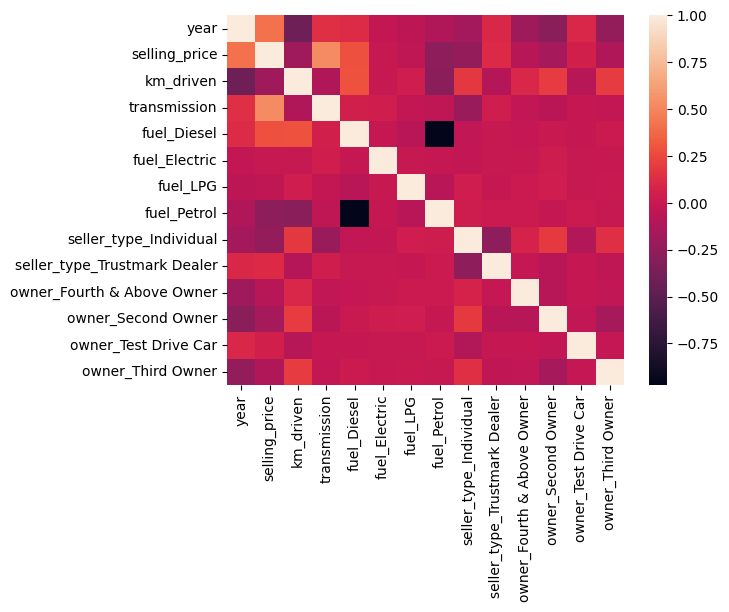

In [36]:
sns.heatmap(car_details.corr())

<Axes: >

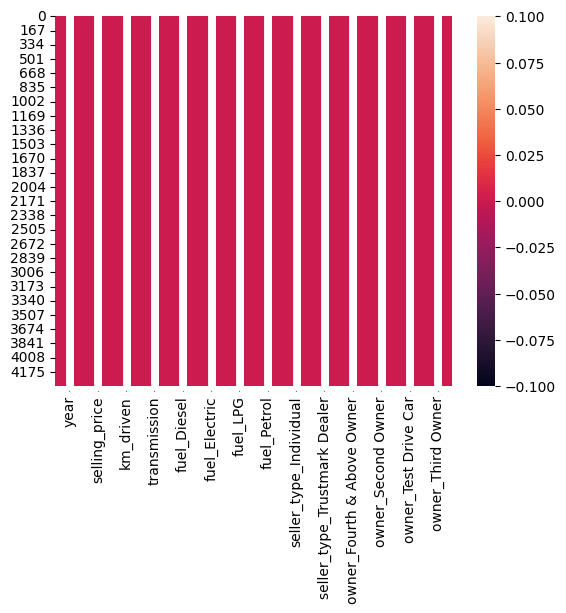

In [37]:
sns.heatmap(car_details.isnull(), annot= True)

Text(0.5, 1.0, 'Feature Correlation Heatmap')

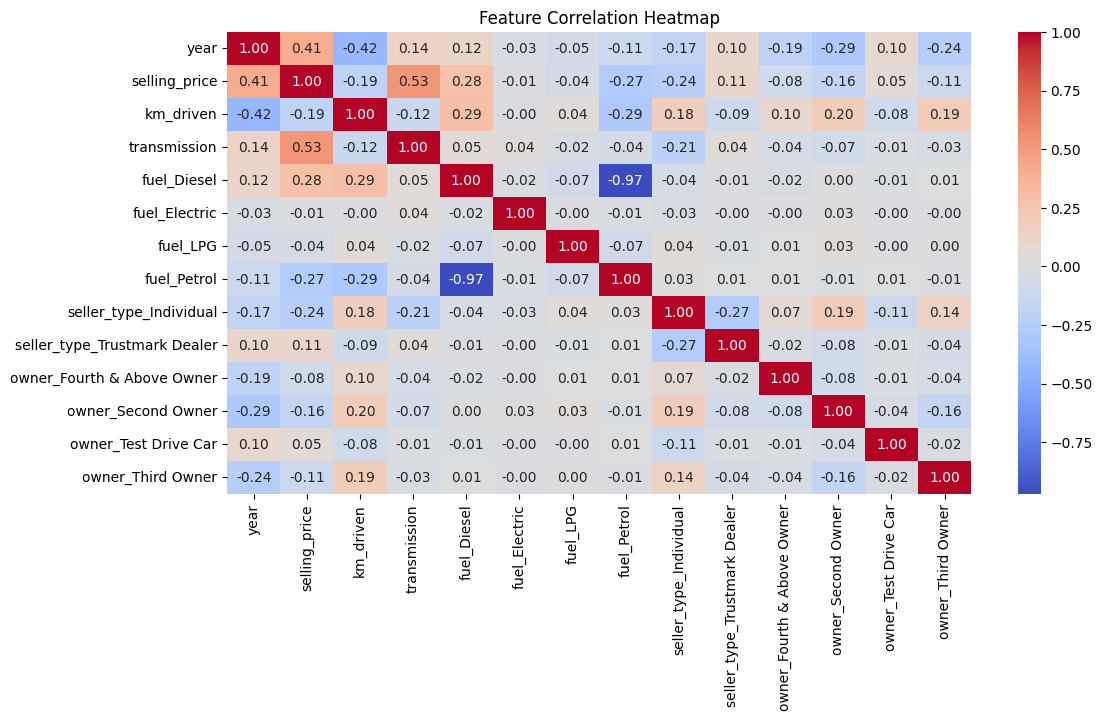

In [38]:
corr = car_details.corr(numeric_only=True)

plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")

In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [42]:
input=[[0, 0, 0, 1, 1, 0, 1, 0, 0, 1 ,0]]
yp=model.predict(input)
yp

array([1053054.59898407])